In [19]:
# Titanic Survival - Logistic regression

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\titanic.csv')

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# handling missing values
# eliminamos la columnas cabin
df=df.drop(columns='Cabin',index=1)

In [25]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_19960\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [29]:
# determinamos la moda de la columna embarked
df['Embarked'].mode() # es el valor S

0    S
Name: Embarked, dtype: object

In [31]:
df['Embarked'].mode()[0]

'S'

In [33]:
# sustituimos
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_19960\3415936572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [35]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [43]:
# numero de personas que sobrevivieron
df['Survived'].value_counts()

Survived
0    549
1    341
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

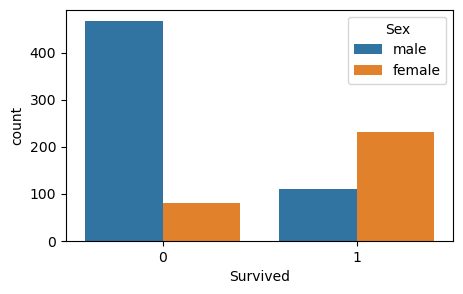

In [55]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

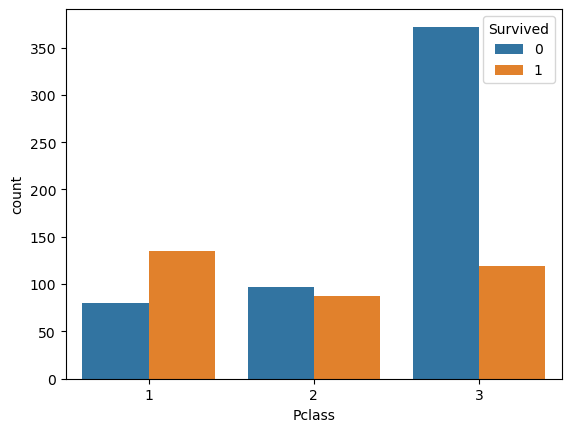

In [67]:
sns.countplot(data=df,x='Pclass', hue='Survived')

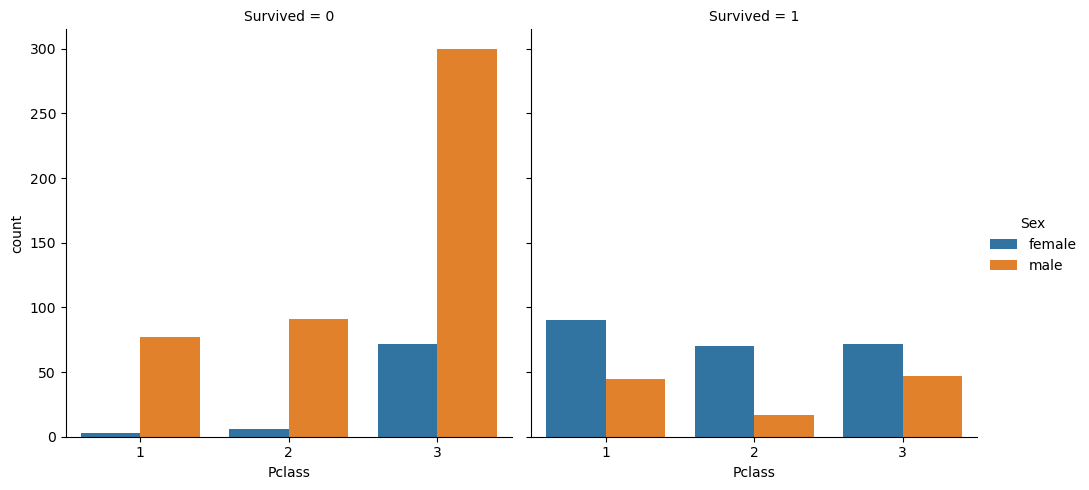

In [69]:
sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count')

In [81]:
# reemplazamos valores categoricos
df.replace({'Sex':{'female':1,'male':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_19960\4174165893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'female':1,'male':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.687475,0,0,330877,8.4583,2


In [87]:
# separacion de variables
X=df.drop(columns=['PassengerId','Name','Ticket'], axis=1)
y=df['Survived']

In [93]:
# spli
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
print(X.shape,X_train.shape,X_test.shape)

(890, 8) (712, 8) (178, 8)


In [97]:
model=LogisticRegression()

In [99]:
model.fit(X_train,y_train)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
# accuracy
X_train_pred=model.predict(X_train)
accuracy_train=metrics.accuracy_score(X_train_pred,y_train)
print(accuracy_train)

1.0


In [103]:
X_test_pred=model.predict(X_test)
accuracy_test=metrics.accuracy_score(X_test_pred,y_test)
print(accuracy_test)

1.0
